## About Dataset
#### Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are 25 variables:

1. **ID**: ID of each client
2. **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. **SEX**: Gender (1=male, 2=female)
4. **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
6. **AGE**: Age in years
7. **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. **PAY_2** : Repayment status in August, 2005 (scale same as above)
9. **PAY_3** : Repayment status in July, 2005 (scale same as above)
10. **PAY_4**: Repayment status in June, 2005 (scale same as above)
11. **PAY_5**: Repayment status in May, 2005 (scale same as above)
12. **PAY_6**: Repayment status in April, 2005 (scale same as above)
13. **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
14. **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
15. **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
16. **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
17. **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
18. **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
19. **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
20. **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
21. **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
22. **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
23. **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
24. **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
25. **default.payment.next.month**: Default payment (1=yes, 0=no)

In [778]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [779]:
original_df = pd.read_csv('default of credit card clients.csv')
data = original_df.copy()
data.shape

(30001, 25)

In [780]:
data.head(2)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


In [781]:
#Fixing column labels
data= data.set_axis(data.iloc[0], axis=1)
data = data.drop(data.index[0])
data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [782]:
## Dropping ID since it is useless here
data.drop(columns=['ID'], inplace=True)

In [783]:
## making columns lowercase
data.columns = data.columns.str.lower()
data.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object', name=0)

In [784]:
#cleaning column names
new_names = {'pay_0': 'repay_status_sept', 'pay_2': 'repay_status_aug', 'pay_3': 'repay_status_jul', 
             'pay_4': 'repay_status_jun', 'pay_5': 'repay_status_may', 'pay_6': 'repay_status_apr',
            'bill_amt1': 'bill_sept', 'bill_amt2': 'bill_aug', 'bill_amt3': 'bill_jul', 'bill_amt4': 'bill_jun',
            'bill_amt5': 'bill_may', 'bill_amt6': 'bill_apr', 'pay_amt1': 'pay_amt_sept', 'pay_amt2': 'pay_amt_aug',
            'pay_amt3': 'pay_amt_jul', 'pay_amt4': 'pay_amt_jun', 'pay_amt5': 'pay_amt_may', 'pay_amt6': 'pay_amt_apr',
            'default payment next month': 'defaulted'}
data.rename(columns=new_names, inplace=True)

In [785]:
data.head(5)

,limit_bal,sex,education,marriage,age,repay_status_sept,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,...,bill_jun,bill_may,bill_apr,pay_amt_sept,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,defaulted
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Dependent Variable Info**

<AxesSubplot:xlabel='defaulted', ylabel='count'>

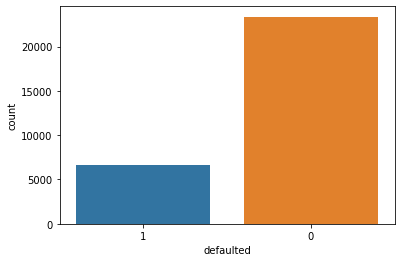

In [786]:
sns.countplot(x = 'defaulted', data = data)

In [787]:
# a lot more people who have not defaulted vs those who have

In [788]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   limit_bal          30000 non-null  object
 1   sex                30000 non-null  object
 2   education          30000 non-null  object
 3   marriage           30000 non-null  object
 4   age                30000 non-null  object
 5   repay_status_sept  30000 non-null  object
 6   repay_status_aug   30000 non-null  object
 7   repay_status_jul   30000 non-null  object
 8   repay_status_jun   30000 non-null  object
 9   repay_status_may   30000 non-null  object
 10  repay_status_apr   30000 non-null  object
 11  bill_sept          30000 non-null  object
 12  bill_aug           30000 non-null  object
 13  bill_jul           30000 non-null  object
 14  bill_jun           30000 non-null  object
 15  bill_may           30000 non-null  object
 16  bill_apr           30000 non-null  objec

In [789]:
## Converting columns to numeric:# Iterate over the columns in the DataFrame
for column in data.columns:
    # Check if the column can be converted to a float
    if data[column].str.contains('\.').any():
        # If the column contains decimal points, convert it to a float
        data[column] = data[column].astype(float)
    else:
        # If the column does not contain decimal points, convert it to an integer
        data[column] = data[column].astype(int)

In [790]:
data.dtypes

0
limit_bal            int64
sex                  int64
education            int64
marriage             int64
age                  int64
repay_status_sept    int64
repay_status_aug     int64
repay_status_jul     int64
repay_status_jun     int64
repay_status_may     int64
repay_status_apr     int64
bill_sept            int64
bill_aug             int64
bill_jul             int64
bill_jun             int64
bill_may             int64
bill_apr             int64
pay_amt_sept         int64
pay_amt_aug          int64
pay_amt_jul          int64
pay_amt_jun          int64
pay_amt_may          int64
pay_amt_apr          int64
defaulted            int64
dtype: object

In [791]:
data.shape

(30000, 24)

In [792]:
# no null values

In [793]:
data2 = data.copy()

In [794]:
y = data2['defaulted'].copy()
X = data2.drop('defaulted', axis=1).copy()

In [795]:
# Print the number of unique values and their counts for each column
for column in X.columns:
    print(f"{column}: {X[column].nunique()}")

limit_bal: 81
sex: 2
education: 7
marriage: 4
age: 56
repay_status_sept: 11
repay_status_aug: 11
repay_status_jul: 11
repay_status_jun: 11
repay_status_may: 10
repay_status_apr: 10
bill_sept: 22723
bill_aug: 22346
bill_jul: 22026
bill_jun: 21548
bill_may: 21010
bill_apr: 20604
pay_amt_sept: 7943
pay_amt_aug: 7899
pay_amt_jul: 7518
pay_amt_jun: 6937
pay_amt_may: 6897
pay_amt_apr: 6939


**Observations**:
1. Since sex is binary and only has 2 unique values - don't need to worry about encoding this variable
2. Why do education and marriage have 7 and 4 unique values respectively?

In [796]:
## analyzing education values
X['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [797]:
## I will combine 5,6, and 0 with the unknown category (4)
X['education'] = X['education'].replace({5: 4, 6: 4, 0: 4})
X['education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

In [798]:
# analyzing marriage values
X['marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

In [799]:
#combining 0 with others category (3)
X['marriage'] = X['marriage'].replace({0: 3})
X['marriage'].value_counts()

2    15964
1    13659
3      377
Name: marriage, dtype: int64

In [800]:
## Encoding education and marriage since they are unordered nominal features
education_onehot = pd.get_dummies(X['education'], prefix='education')

# Rename the education columns with the corresponding education levels
education_levels = {
    'education_1': 'graduate_school',
    'education_2': 'university',
    'education_3': 'high_school',
    'education_4': 'others_education'
}
education_onehot = education_onehot.rename(columns=education_levels)

# Concatenate the one-hot encoded columns with the original DataFrame
X = pd.concat([X, education_onehot], axis=1)

# Remove the original "education" column
X = X.drop(['education'], axis=1)

marriage_onehot = pd.get_dummies(X['marriage'], prefix='marriage')

# Rename the marriage columns with the corresponding marital statuses
marital_statuses = {
    'marriage_1': 'married',
    'marriage_2': 'single',
    'marriage_3': 'others_married'
}
marriage_onehot = marriage_onehot.rename(columns=marital_statuses)

# Concatenate the one-hot encoded columns with the original DataFrame
X = pd.concat([X, marriage_onehot], axis=1)

# Remove the original "marriage" column
X = X.drop(['marriage'], axis=1)

In [801]:
X.head()

,limit_bal,sex,age,repay_status_sept,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,bill_sept,...,pay_amt_jun,pay_amt_may,pay_amt_apr,graduate_school,university,high_school,others_education,married,single,others_married
1,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,0,1,0,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,1000,0,2000,0,1,0,0,0,1,0
3,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,5000,0,1,0,0,0,1,0
4,50000,2,37,0,0,0,0,0,0,46990,...,1100,1069,1000,0,1,0,0,1,0,0
5,50000,1,57,-1,0,-1,0,0,0,8617,...,9000,689,679,0,1,0,0,1,0,0


In [802]:
X.shape

(30000, 28)

In [803]:
#applying a standard scaler to the data to give values more equal weight between columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [804]:
X.head()

,limit_bal,sex,age,repay_status_sept,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,bill_sept,...,pay_amt_jun,pay_amt_may,pay_amt_apr,graduate_school,university,high_school,others_education,married,single,others_married
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,...,-0.308063,-0.314136,-0.293382,-0.738375,1.0669,-0.442752,-0.125886,1.093780,-1.066471,-0.112812
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,...,-0.244230,-0.314136,-0.180878,-0.738375,1.0669,-0.442752,-0.125886,-0.914261,0.937672,-0.112812
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,...,-0.244230,-0.248683,-0.012122,-0.738375,1.0669,-0.442752,-0.125886,-0.914261,0.937672,-0.112812
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,...,-0.237846,-0.244166,-0.237130,-0.738375,1.0669,-0.442752,-0.125886,1.093780,-1.066471,-0.112812
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,...,0.266434,-0.269039,-0.255187,-0.738375,1.0669,-0.442752,-0.125886,1.093780,-1.066471,-0.112812


In [805]:
X['defaulted'] = y.reset_index(drop=True)

In [806]:
X['defaulted'].value_counts()

0    23364
1     6636
Name: defaulted, dtype: int64

In [807]:
X.shape

(30000, 29)

**Model Assumptions**:
1. Multicollinearity

<AxesSubplot:title={'center':'Credit Card Data Heatmap'}>

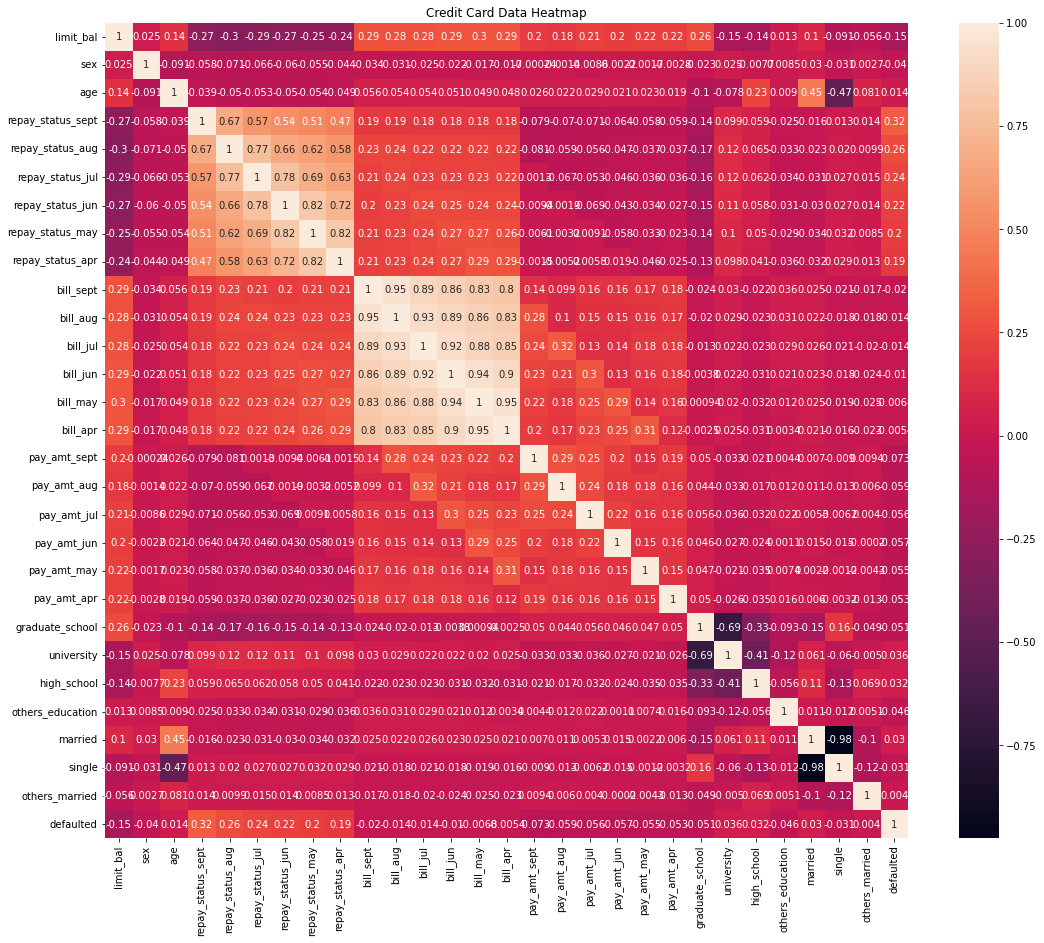

In [808]:
## Visualize using correlation
corr = X.corr()
plt.figure(figsize=(18,15))
plt.title('Credit Card Data Heatmap')
sns.heatmap(corr,annot=True)

**Observations**:
1. credit card bill statement amounts for each month are highly correlated with each other
2. Repayment status for each month is high correlcated with one another
3. No strong correlations between default outcome and any potential predictor variables.
4. Potential Multicollinearity issues but don't want to remove for now as they could be useful predictors

In [809]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X1 = X.drop('defaulted', axis=1)
y1 = X['defaulted']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [810]:
X_train['defaulted'] = y_train
X_test['defaulted'] = y_test